In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_sales = pd.read_csv('../data/clean_step2.csv')

In [3]:
df_sales.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,...,perc_pis_cofins,perc_icms,perc_tax_substitution,unit_revenue,unit_price,unit_perc_pis_cofins,unit_perc_icms,unit_perc_tax_substitution,unit_liquid_cost,unit_markup
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,9.25,0.0,19.60,436.1935,978.90,9.25,0.0,19.60,542.7065,0.803737
1,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,9.25,0.0,19.60,436.1935,978.90,9.25,0.0,19.60,542.7065,0.803737
2,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,9.25,0.0,19.71,433.3435,976.05,9.25,0.0,19.71,542.7065,0.798486
3,a8ad36828898fa3f6efeb5bd19c076f2,e6762ba2ffbca07ab6cee7551caeaad5,1,1089.10,100.7418,185.147,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,9.25,17.0,0.00,546.3935,1089.10,9.25,17.0,0.00,542.7065,1.006794
4,9cbfaac6e04ea6ed454b843c94f2c29c,e6762ba2ffbca07ab6cee7551caeaad5,1,949.00,87.7825,170.820,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,9.25,18.0,0.00,406.2935,949.00,9.25,18.0,0.00,542.7065,0.748643


In [4]:
df_sales.describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999])

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,revenue,markup,week_number,month,perc_pis_cofins,perc_icms,perc_tax_substitution,unit_revenue,unit_price,unit_perc_pis_cofins,unit_perc_icms,unit_perc_tax_substitution,unit_liquid_cost,unit_markup
count,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000
mean,1.050653,233.439841,19.446323,24.590919,18.274328,135.678992,97.760848,0.805955,25.741002,6.385391,8.287362,10.347968,7.992504,90.545141,224.271591,8.156754,10.159603,7.941057,133.726450,0.738683
std,0.405702,154.475453,15.034110,29.380116,28.044705,81.685219,102.029945,0.754525,15.982790,3.636626,2.824497,8.950847,9.780609,54.681284,126.387220,2.901450,8.900233,9.786256,82.225024,0.301408
min,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,-66.483700,-0.289836,0.000000,1.000000,0.000000,0.000000,0.000000,-66.483700,6.910000,0.000000,0.000000,0.000000,1.612530,-0.289836
0.01%,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,-4.614900,-0.028274,0.000000,1.000000,0.000000,0.000000,0.000000,-4.614900,6.910000,0.000000,0.000000,0.000000,4.114100,-0.028274
25%,1.000000,149.410000,10.430300,0.000000,0.000000,76.865400,55.375100,0.545132,12.000000,3.000000,9.250000,0.000000,0.000000,54.795300,146.475000,9.250000,0.000000,0.000000,75.957600,0.545132
50%,1.000000,194.800000,17.519500,19.880000,0.000000,117.082000,79.323500,0.696978,24.000000,6.000000,9.250000,17.000000,0.000000,78.584500,191.280000,9.250000,17.000000,0.000000,116.627300,0.696943
75%,1.000000,309.900000,28.618600,38.860200,30.861200,205.899700,115.971800,0.897382,41.000000,10.000000,9.250000,18.000000,18.370000,113.653800,305.875000,9.250000,18.000000,18.370000,205.899700,0.897382
90%,1.000000,359.910000,33.244500,61.098000,69.057300,213.438200,155.961800,1.110051,47.000000,11.000000,9.250000,18.000000,21.620000,150.961800,359.400000,9.250000,18.000000,21.620000,213.438200,1.083155
99%,2.000000,820.567000,70.280660,131.220000,100.815700,496.929700,421.293500,3.125190,52.000000,12.000000,9.250000,20.000000,27.120000,291.205000,766.176000,9.250000,20.000000,27.120000,496.929700,1.788443


* The majority of the orders have 1 unity of product 
* An order with 100 itens seems to be a huge outlier since it is too farway from the 99.99% percentile. 
* The tax_substituion == 0 indicates sales within the same icms range (state maybe), need checks
* I'm missing some geolocation indicators
* Pis/Cofins == 0 for basic meal itens; soaps; bucal higiene; toilet paper; some books (digital books?); etc.

Now not only the high sale value that was showing for one order has moved out but also the markup of 136% over the cost.

## Verify the distributions

In [5]:
df_sales[['category', 'code', 'source_channel']].nunique()

category           11
code              130
source_channel     14
dtype: int64

In [6]:
def summary_dist(target_col, base_col='order_id', method='count'):
    if method == 'count':
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.nunique}).reset_index()
    else:
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.sum}).reset_index()
    df_summary[base_col] = df_summary[base_col] / df_summary[base_col].sum()  * 100
    return df_summary.sort_values(base_col)

## Back to the distribution

In [7]:
df_orders_channel = summary_dist('source_channel', )
df_orders_channel

,source_channel,order_id
11,e9b49f9086ba813ca3f0b321710fef16,0.001408
1,2934a86a91bfa55d7f20b4f08a441fac,0.006335
4,67c19e107de33cab7ea9a9db8bc9ccd2,0.032379
9,af082bb0c2fa1414655017d464aa0262,0.468793
2,3ab2427543039f8c9f17d06f6f65a3a7,1.727354
3,5a97b8efd901c1d28ff86522b95babb9,1.755510
12,ea2912716be1999ab62d5b9dfa4f58f9,2.108864
5,7261d300057219056592010c7bdaf5ee,2.282726
6,98defd6ee70dfb1dea416cecdf391f58,2.999289
0,152bf0ce464047b9499ccb9e5b9b77a8,3.195675


* It is interesting to see that 45% of the orders are from 1 channel
* There are 3 more interesting channels way up the top with 20%, 10% and 9 % aprox

In [8]:
df_orders_channel_quantity = summary_dist('source_channel', base_col='quantity', method='sum')
df_orders_channel_quantity

,source_channel,quantity
11,e9b49f9086ba813ca3f0b321710fef16,0.001315
1,2934a86a91bfa55d7f20b4f08a441fac,0.005919
4,67c19e107de33cab7ea9a9db8bc9ccd2,0.099302
9,af082bb0c2fa1414655017d464aa0262,0.564244
2,3ab2427543039f8c9f17d06f6f65a3a7,1.687470
3,5a97b8efd901c1d28ff86522b95babb9,1.732188
12,ea2912716be1999ab62d5b9dfa4f58f9,2.124791
5,7261d300057219056592010c7bdaf5ee,2.289198
0,152bf0ce464047b9499ccb9e5b9b77a8,3.148716
6,98defd6ee70dfb1dea416cecdf391f58,3.336139


It seems that the quantity of products follows the amount of orders and the top 4 channel are the same.

In [9]:
df_orders_channel_revenue = summary_dist('source_channel', base_col='revenue', method='sum')
df_orders_channel_revenue

,source_channel,revenue
11,e9b49f9086ba813ca3f0b321710fef16,0.001352
1,2934a86a91bfa55d7f20b4f08a441fac,0.006604
4,67c19e107de33cab7ea9a9db8bc9ccd2,0.134100
9,af082bb0c2fa1414655017d464aa0262,0.620643
2,3ab2427543039f8c9f17d06f6f65a3a7,1.567831
12,ea2912716be1999ab62d5b9dfa4f58f9,1.872116
3,5a97b8efd901c1d28ff86522b95babb9,1.918300
5,7261d300057219056592010c7bdaf5ee,2.105942
0,152bf0ce464047b9499ccb9e5b9b77a8,3.030425
6,98defd6ee70dfb1dea416cecdf391f58,3.950939


The ranking shfits a bit bringing the category, when the 90c category gets a higher share on revenue with a lower percentage of the quantity of sales. 

## Deep dive on the channels

In [10]:
top_5_channels_orders = df_orders_channel.tail(5).source_channel.values
top_5_channels_product_revenue = df_orders_channel_revenue.tail(5).source_channel.values
top_5_channels_product_quantity = df_orders_channel_quantity.tail(5).source_channel.values

selected_channels = list(set(list(top_5_channels_orders)+ list(top_5_channels_product_quantity)+ list(top_5_channels_product_revenue)))
selected_channels

['152bf0ce464047b9499ccb9e5b9b77a8',
 '9d3e0fcbc1f16d80a76026e8f1c26002',
 'fc7020775a7cdf161ab5267985c54601',
 '98defd6ee70dfb1dea416cecdf391f58',
 'b76eb9b8fc0f17098812da9117d3e500',
 'a578e71c3216f513a84ec6a46084fd3a']

In [11]:
selected_cols = ['category', 'code', 'source_channel','month', 'revenue', 'unit_price', 'unit_liquid_cost', 'unit_perc_pis_cofins', 'unit_perc_icms', 'unit_perc_tax_substitution', 'unit_markup', 'quantity', 'week_number']

In [12]:
df_filtered_sales = df_sales[[c for c in df_sales.columns if 'unit' not in c and  'perc' not in c ]][
    df_sales.source_channel.isin(selected_channels)]
df_filtered_sales.groupby('source_channel').describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999]).T

source_channel           152bf0ce464047b9499ccb9e5b9b77a8  \
quantity         count                        4593.000000   
                 mean                            1.042456   
                 std                             0.331531   
                 min                             1.000000   
                 0.01%                           1.000000   
                 25%                             1.000000   
                 50%                             1.000000   
                 75%                             1.000000   
                 90%                             1.000000   
                 99%                             2.000000   
                 99.99%                         10.000000   
                 max                            10.000000   
price            count                        4593.000000   
                 mean                          222.150340   
                 std                           111.141749   
                 min                            35.400000   
                 0.01%                          35.565312   
                 25%                           176.410000   
                 50%                           194.410000   
                 75%                           242.910000   
                 90%                           338.516000   
                 99%                           690.825200   
                 99.99%                       2061.714560   
                 max                          2369.700000   
pis_cofins       count                        4593.000000   
                 mean                           19.533525   
                 std                            10.027420   
                 min                             0.000000   
                 0.01%                           0.000000   
                 25%                            15.809200   
                 50%                            17.937600   
                 75%                            22.144500   
                 90%                            30.932900   
                 99%                            57.849176   
                 99.99%                        118.002308   
                 max                           124.967500   
icms             count                        4593.000000   
                 mean                           26.565926   
                 std                            26.056933   
                 min                             0.000000   
                 0.01%                           0.000000   
                 25%                             0.000000   
                 50%                            32.292000   
                 75%                            39.038400   
                 90%                            56.718960   
                 99%                            93.636432   
                 99.99%                        386.712237   
                 max                           426.546000   
tax_substitution count                        4593.000000   
                 mean                           14.016708   
                 std                            22.521426   
                 min                             0.000000   
                 0.01%                           0.000000   
                 25%                             0.000000   
                 50%                             0.000000   
                 75%                            30.047900   
                 90%                            38.484300   
                 99%                            72.361548   
                 99.99%                        202.615520   
                 max                           225.333200   
liquid_cost      count                        4593.000000   
                 mean                          128.796189   
                 std                            63.514095   
                 min                            27.284700   
                 0.01%             

Those 4 categories respond for almost all sales in the dataset, the distributions are very similar to the whole dataset itself.
* The category 9a97178a18aa6333aabdfb21de182b99 doens't have to pay pis/cofins
* the Category f79dccaf0b890eced0724d8563948c4f doens't have much orders 73 and have the lower prices on of the 4 including its costs with a low deviation.
* For the category 388128822cef4b4f102ae881e040a64b the price and cost deviation appear more Stable given the distribution percentiles, max, mean and deviations. Is that a price sentive one?
* Why the category dda as a zero tax substitution of its sales? 

In [13]:
df_product_cat_orders = pd.crosstab(
    df_filtered_sales.code, df_filtered_sales.category, margins=True, 
    values=df_filtered_sales.quantity, aggfunc=pd.Series.sum
).reset_index().sort_values('All')
df_product_cat_orders

category,code,388128822cef4b4f102ae881e040a64b,4ece547755cba9e7fc14125bc895f31b,568696c0b6828f77884ea8628fcc6200,61ad270def6d4b2403f4536f39cff29a,90cc5bdd050bcd7cf0d50d079d0fda66,98f679396a60f117b171ddedfcc3e5ed,9a97178a18aa6333aabdfb21de182b99,9cfa7aefcc61936b70aaec6729329eda,d7ecf0071e88c21e993da125d2229a51,dda10a917a9ea3120e5d299af5105290,f79dccaf0b890eced0724d8563948c4f,All
22,2bc9e1d807d8f9187b8650acd35a14e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2
98,b3fca69c356bec270dc3a90f8b498883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2
70,630b051b117d509fc00a7c72328b1ddf,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
34,3b4407288e2983a514a241c9b84b7094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8
96,b272ba3f4adb1dd16eaac1b53940629e,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,3454ea52396a4cfd3fc37414d30c7b9c,6722.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6722
25,32ceebf3efea1d04ace4183d20d4da5b,6849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6849
44,4534ea61b50410b3b6243e02b40c8cd1,NaN,NaN,NaN,NaN,NaN,NaN,13870.0,NaN,NaN,NaN,NaN,13870
23,2e35421c34fb588ba40a0c57b3971d24,16632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16632


In [14]:
df_product_cat_orders.notna().sum(axis = 0)


category
code                                131
388128822cef4b4f102ae881e040a64b    107
4ece547755cba9e7fc14125bc895f31b      3
568696c0b6828f77884ea8628fcc6200      2
61ad270def6d4b2403f4536f39cff29a      2
90cc5bdd050bcd7cf0d50d079d0fda66      9
98f679396a60f117b171ddedfcc3e5ed      4
9a97178a18aa6333aabdfb21de182b99      3
9cfa7aefcc61936b70aaec6729329eda      2
d7ecf0071e88c21e993da125d2229a51      2
dda10a917a9ea3120e5d299af5105290      3
f79dccaf0b890eced0724d8563948c4f      4
All                                 131
dtype: int64

 * The category 388, not only is the highest in sales by fart but contains much of the variety of products. 
 Although the category 9a9 has the sconde most sold product.
 * The proucts 4534ea61b50410b3b6243e02b40c8cd1 and 7e3713530b46887cff58a2e2ac433ac5 bug me a bit. 

In [15]:
df_product_cat_orders = pd.crosstab(
    df_filtered_sales.code, df_filtered_sales.category, margins=True, 
    values=df_filtered_sales.revenue, aggfunc=pd.Series.sum
).reset_index().sort_values('All')
df_product_cat_orders

category,code,388128822cef4b4f102ae881e040a64b,4ece547755cba9e7fc14125bc895f31b,568696c0b6828f77884ea8628fcc6200,61ad270def6d4b2403f4536f39cff29a,90cc5bdd050bcd7cf0d50d079d0fda66,98f679396a60f117b171ddedfcc3e5ed,9a97178a18aa6333aabdfb21de182b99,9cfa7aefcc61936b70aaec6729329eda,d7ecf0071e88c21e993da125d2229a51,dda10a917a9ea3120e5d299af5105290,f79dccaf0b890eced0724d8563948c4f,All
22,2bc9e1d807d8f9187b8650acd35a14e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.4584,6.945840e+01
70,630b051b117d509fc00a7c72328b1ddf,NaN,132.4364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.324364e+02
34,3b4407288e2983a514a241c9b84b7094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.6860,1.756860e+02
98,b3fca69c356bec270dc3a90f8b498883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.8096,NaN,4.608096e+02
80,7c829a5a8a0e4408b682f4394783483e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477.3647,NaN,NaN,4.773647e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,3454ea52396a4cfd3fc37414d30c7b9c,6.145748e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.145748e+05
25,32ceebf3efea1d04ace4183d20d4da5b,9.484967e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.484967e+05
44,4534ea61b50410b3b6243e02b40c8cd1,NaN,NaN,NaN,NaN,NaN,NaN,1001896.087,NaN,NaN,NaN,NaN,1.001896e+06
23,2e35421c34fb588ba40a0c57b3971d24,2.115170e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.115170e+06


In [16]:
df_product_cat_orders.notna().sum(axis = 0)


category
code                                131
388128822cef4b4f102ae881e040a64b    107
4ece547755cba9e7fc14125bc895f31b      3
568696c0b6828f77884ea8628fcc6200      2
61ad270def6d4b2403f4536f39cff29a      2
90cc5bdd050bcd7cf0d50d079d0fda66      9
98f679396a60f117b171ddedfcc3e5ed      4
9a97178a18aa6333aabdfb21de182b99      3
9cfa7aefcc61936b70aaec6729329eda      2
d7ecf0071e88c21e993da125d2229a51      2
dda10a917a9ea3120e5d299af5105290      3
f79dccaf0b890eced0724d8563948c4f      4
All                                 131
dtype: int64

* Not only the product 7e3713530b46887cff58a2e2ac433ac5 bugs me but it has a high revenue standing on the top the rank of this categories.

# Season movement 

In [17]:
def plot_season_sales(df, target_col, base_col='month'):
    df = df[[base_col, target_col]].groupby(base_col).sum().reset_index()
    return sns.lineplot(x=df[base_col], y=df[target_col])


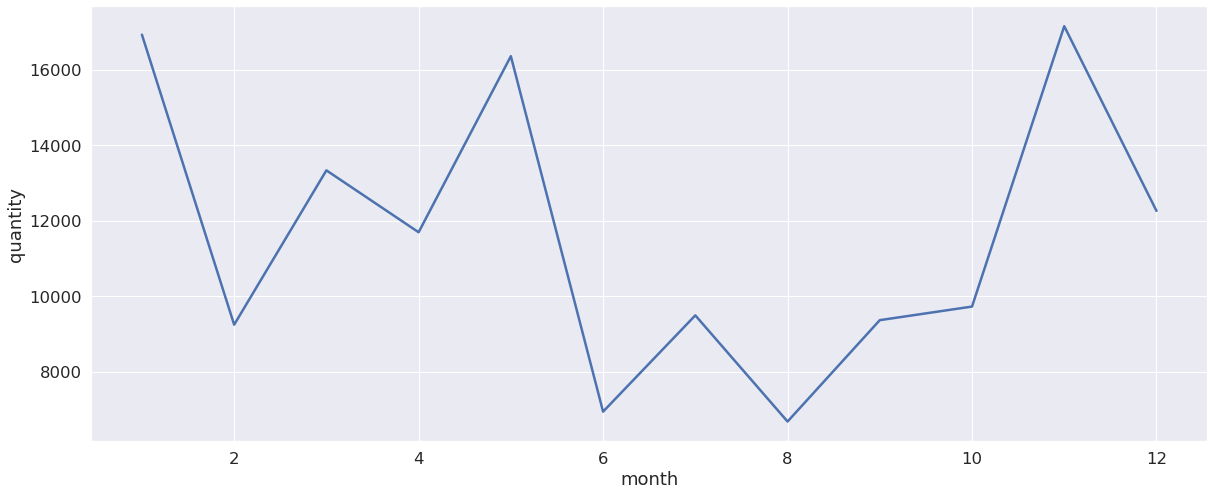

In [18]:
ax = plot_season_sales(df_filtered_sales,'quantity')
plt.show()

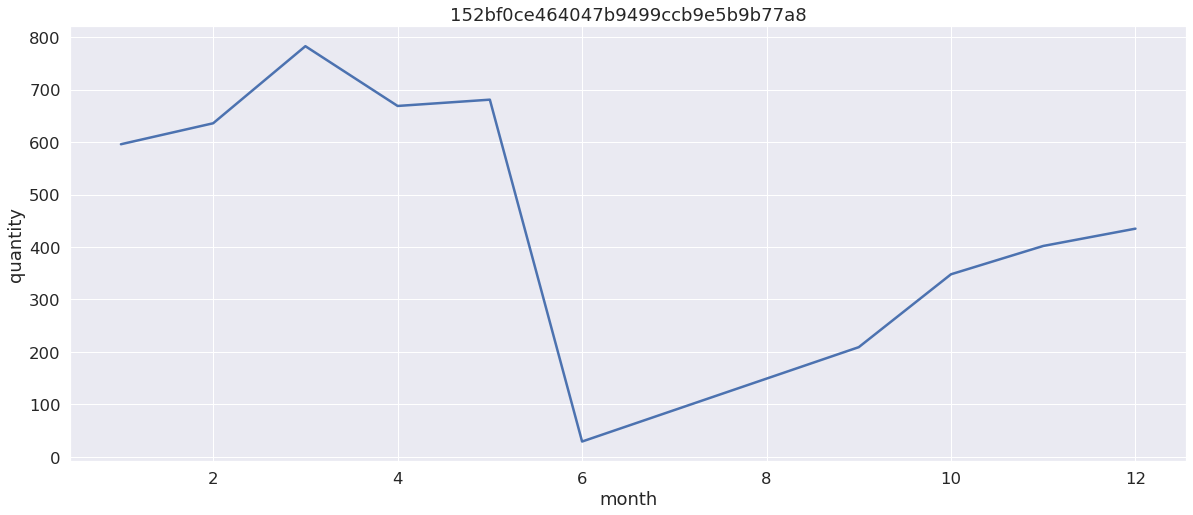

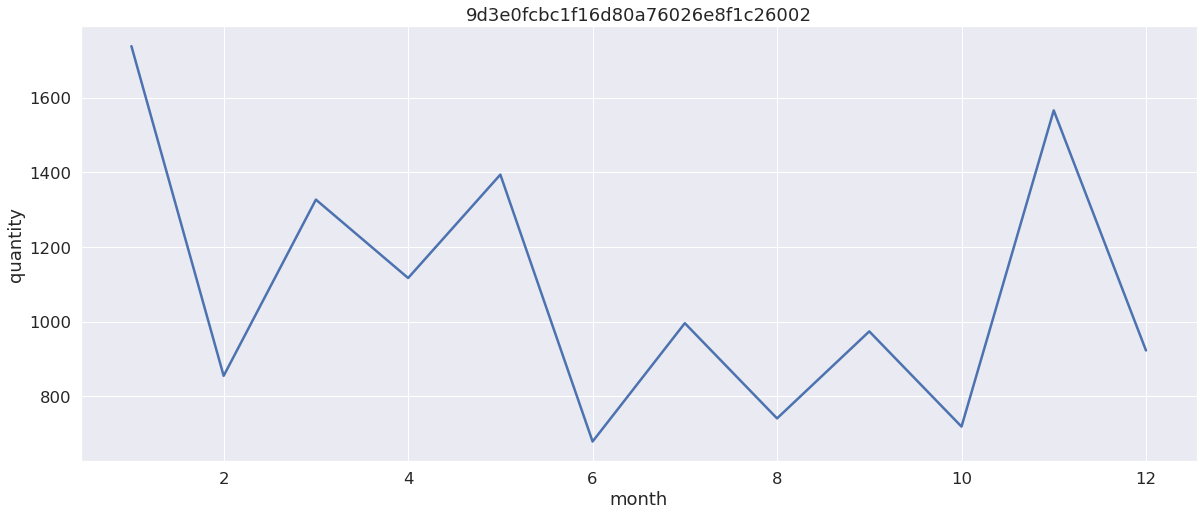

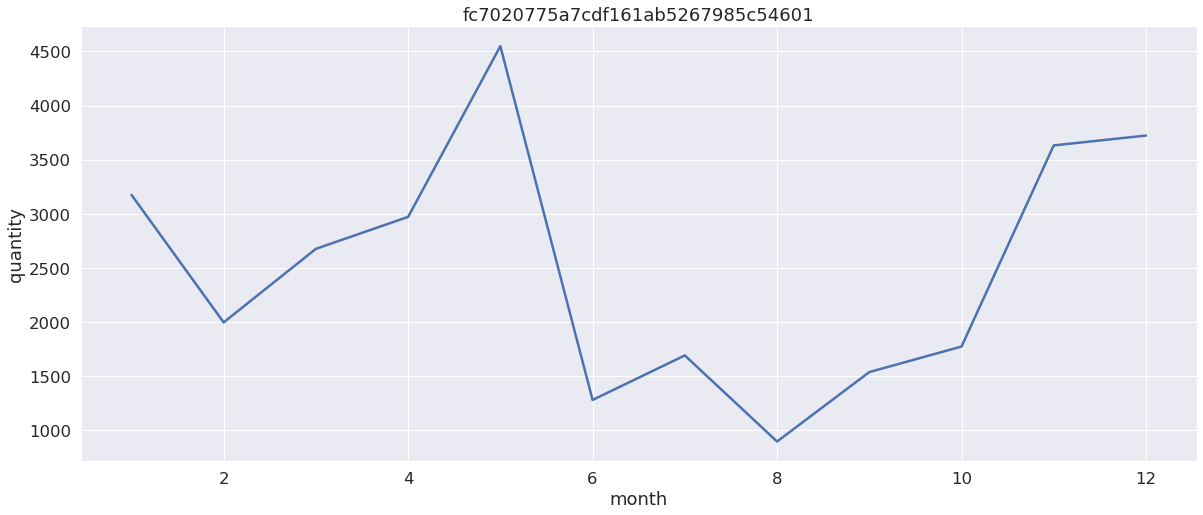

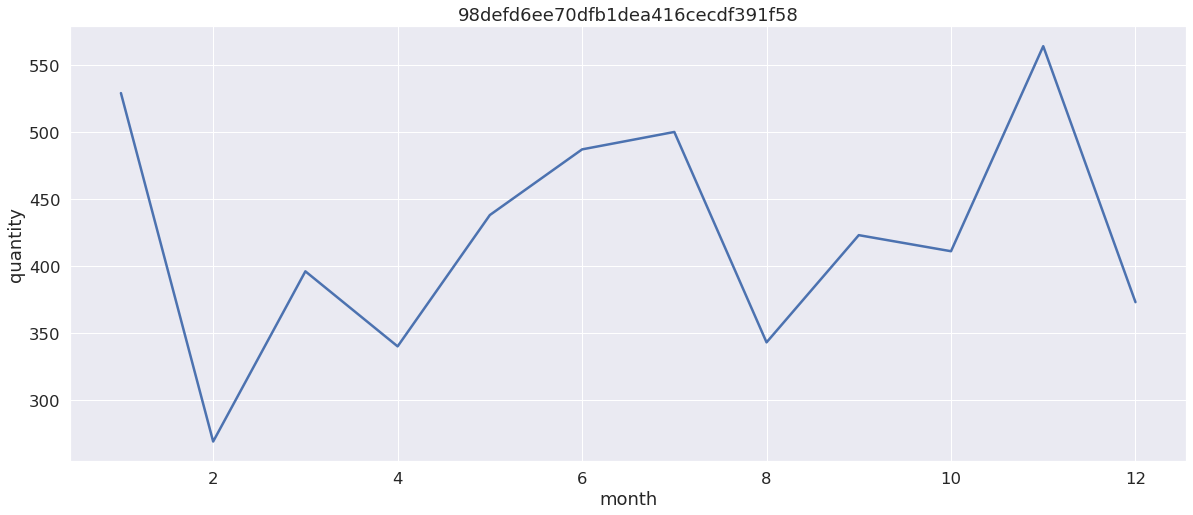

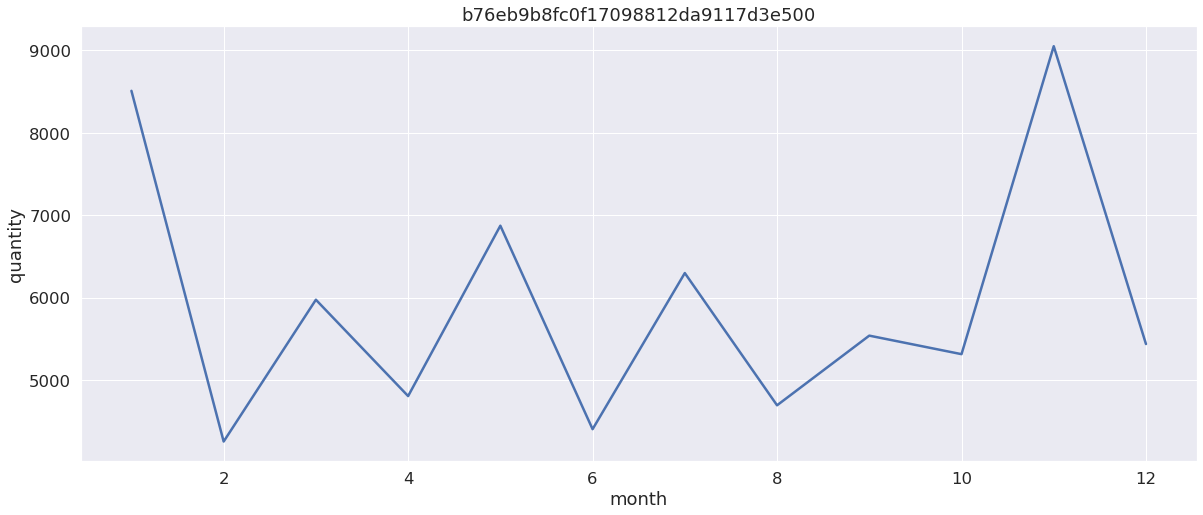

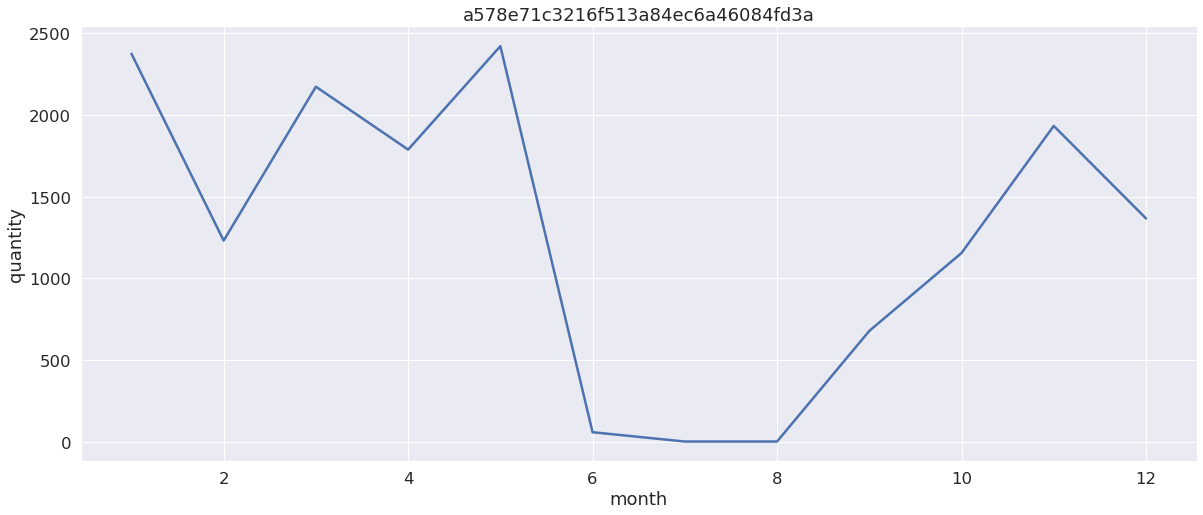

In [19]:
for chl in selected_channels: 
    df = df_filtered_sales[df_filtered_sales.source_channel == chl]
    ax = plot_season_sales(df,'quantity')
    ax.set_title(chl)
    plt.show()

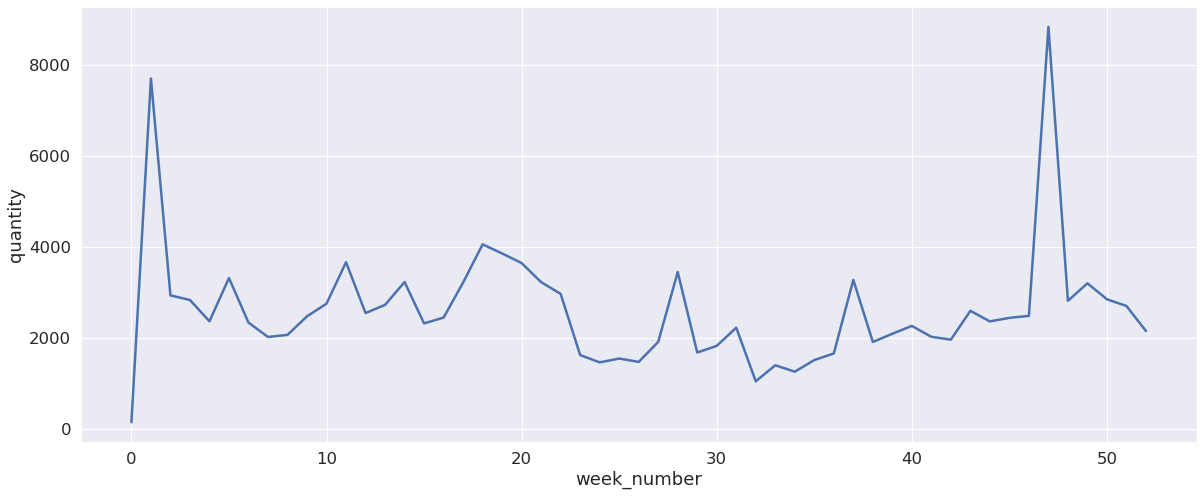

In [20]:
ax = plot_season_sales(df_filtered_sales,'quantity', base_col='week_number')
plt.show()

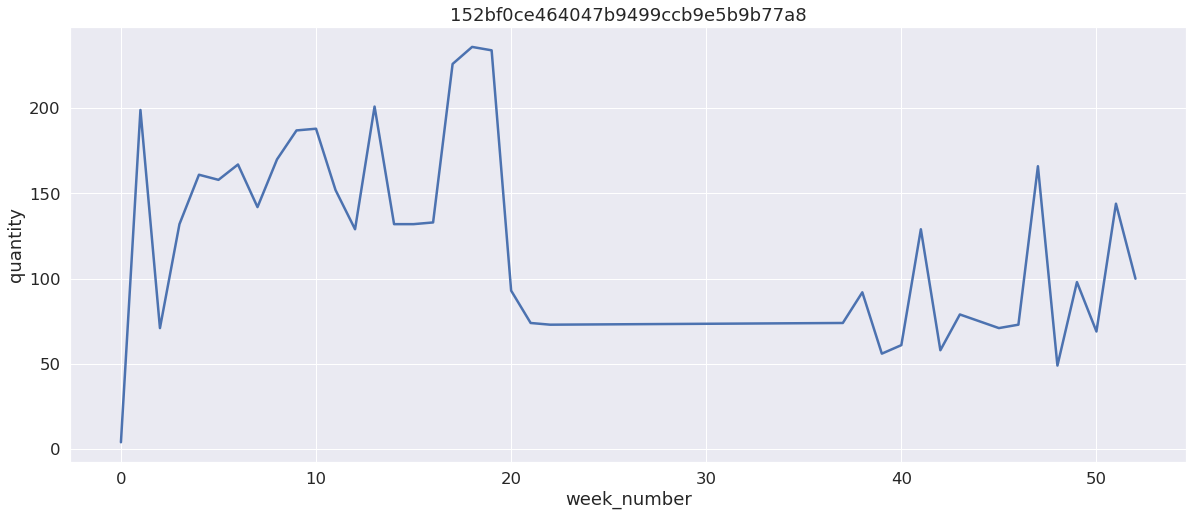

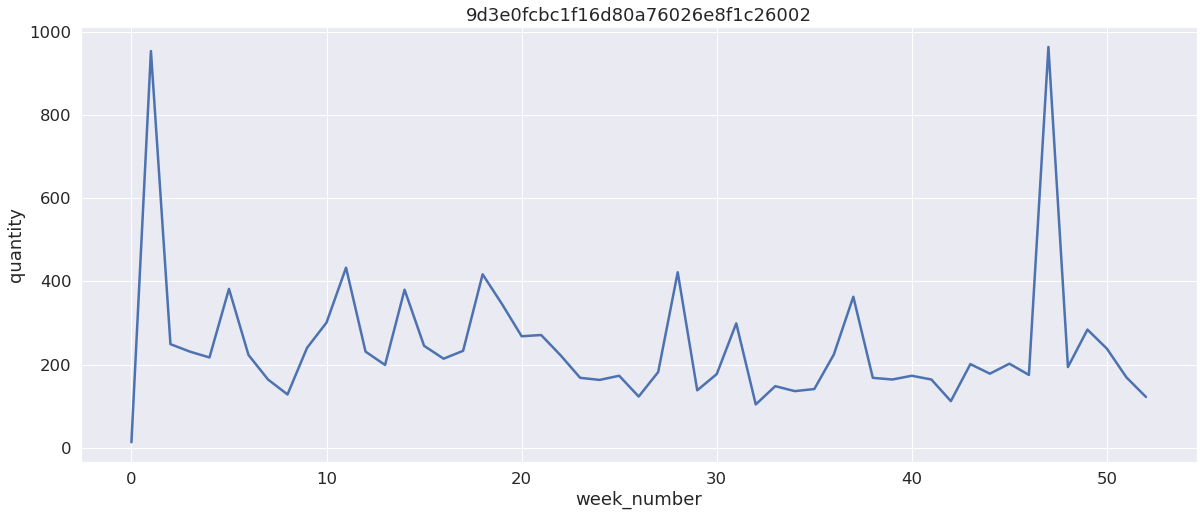

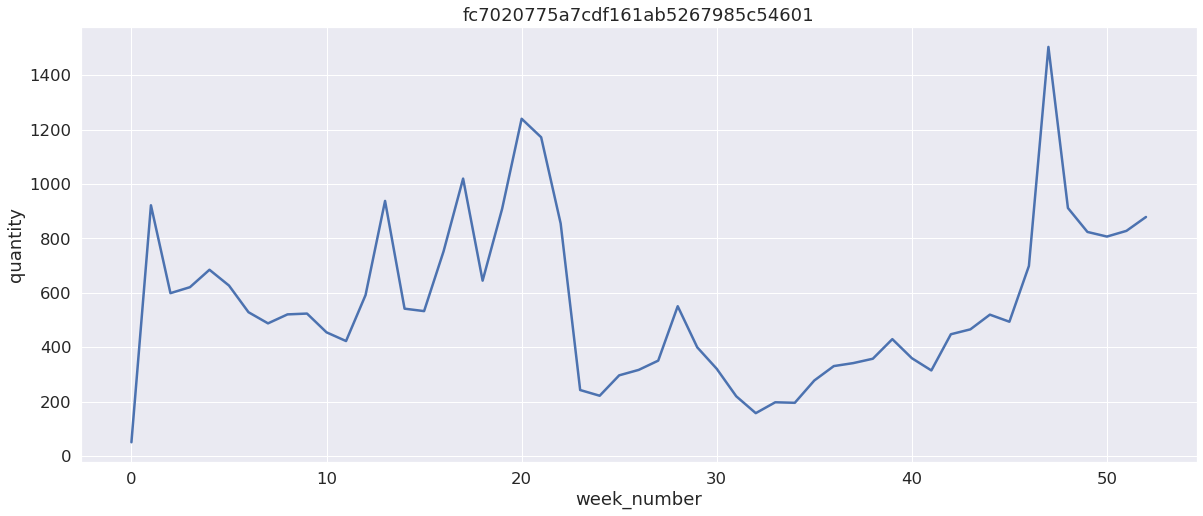

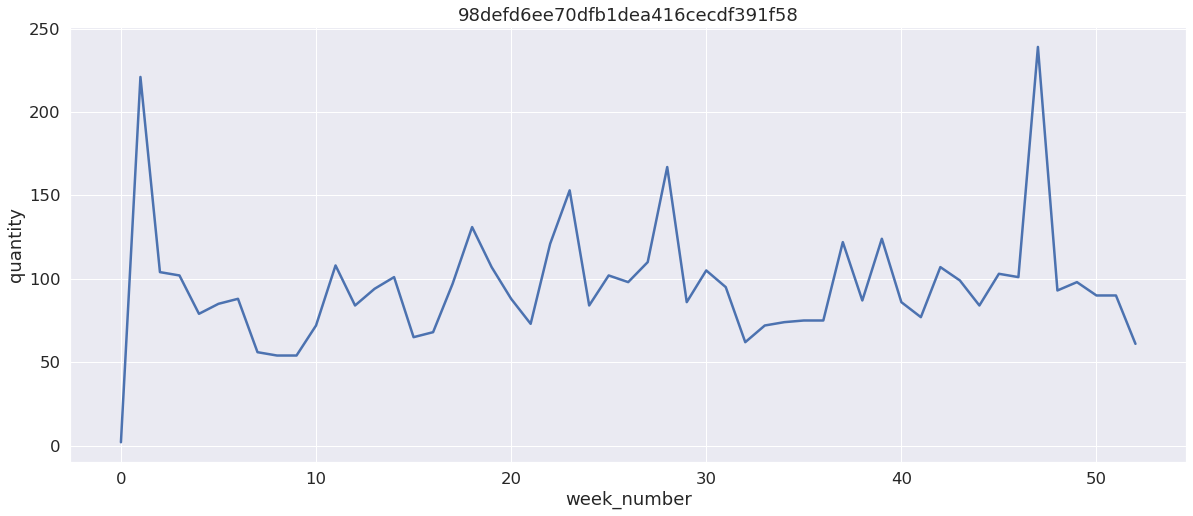

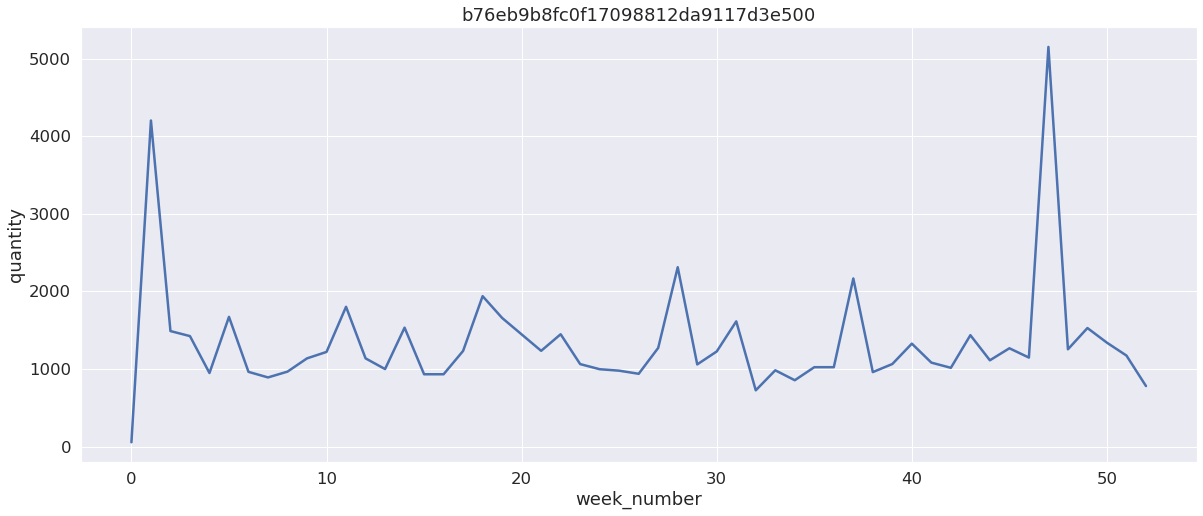

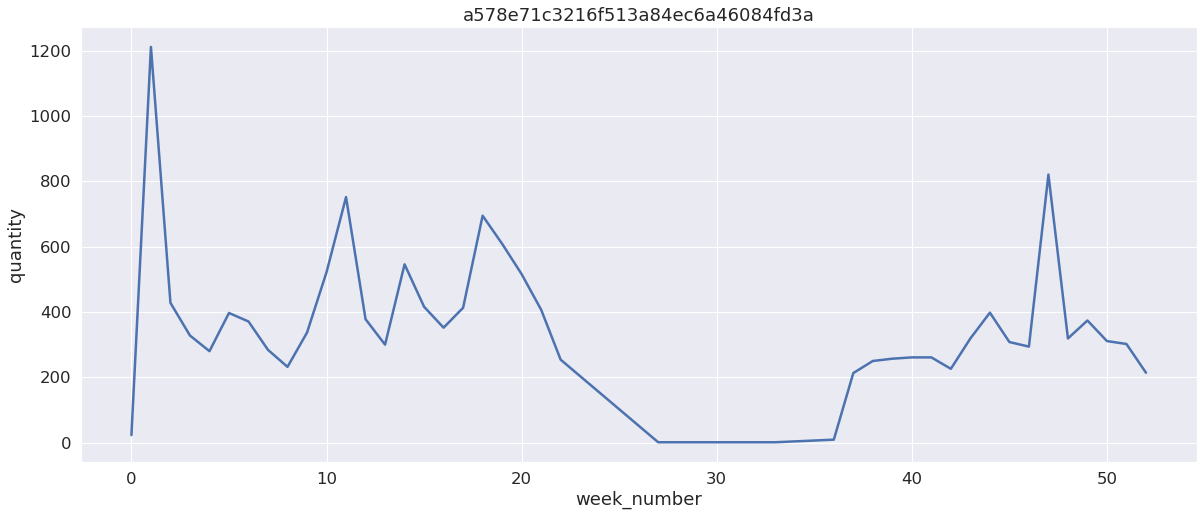

In [21]:

for chl in selected_channels: 
    df = df_filtered_sales[df_filtered_sales.source_channel == chl]
    ax = plot_season_sales(df,'quantity', base_col='week_number')
    ax.set_title(chl)
    plt.show()    

### Quantity
* The sales peak for the whole orders are on jan, may and november with some increase on dec.
* Category 90cc seems to increase quantities on November, december with a whole year stable. 
* There was a peack on september and november for dda
* 9a9 had peaks on may, august and november, december 
* 388 had peacks on ay and november, january
* Christmas, couples and blackfridays? 

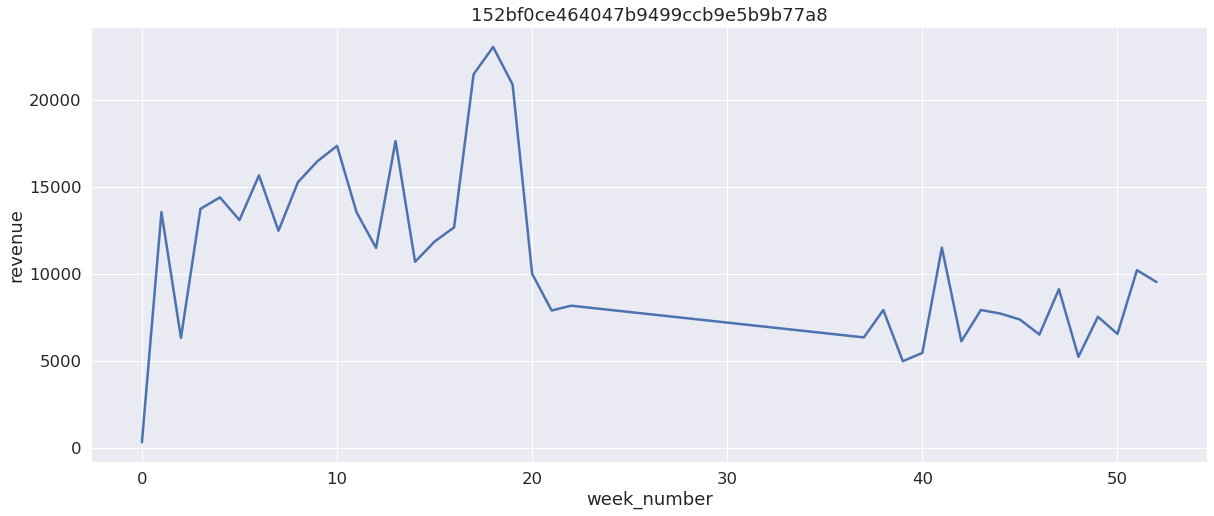

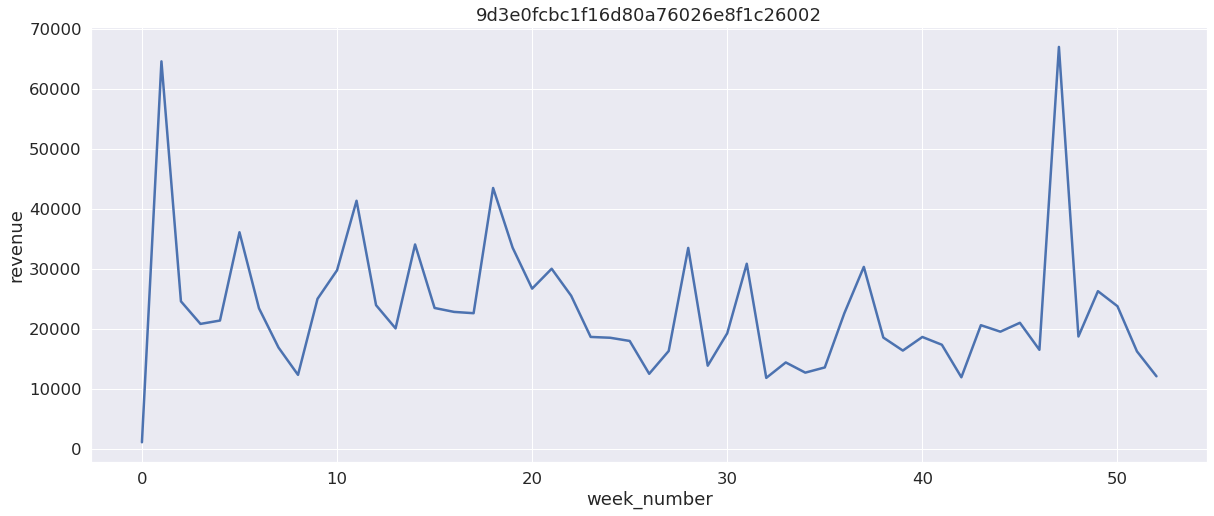

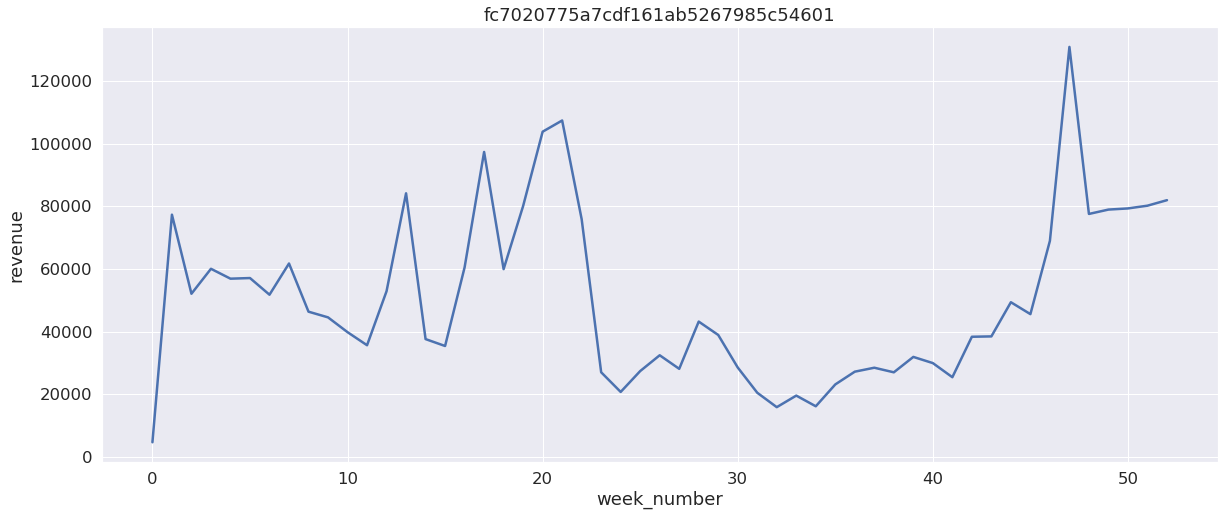

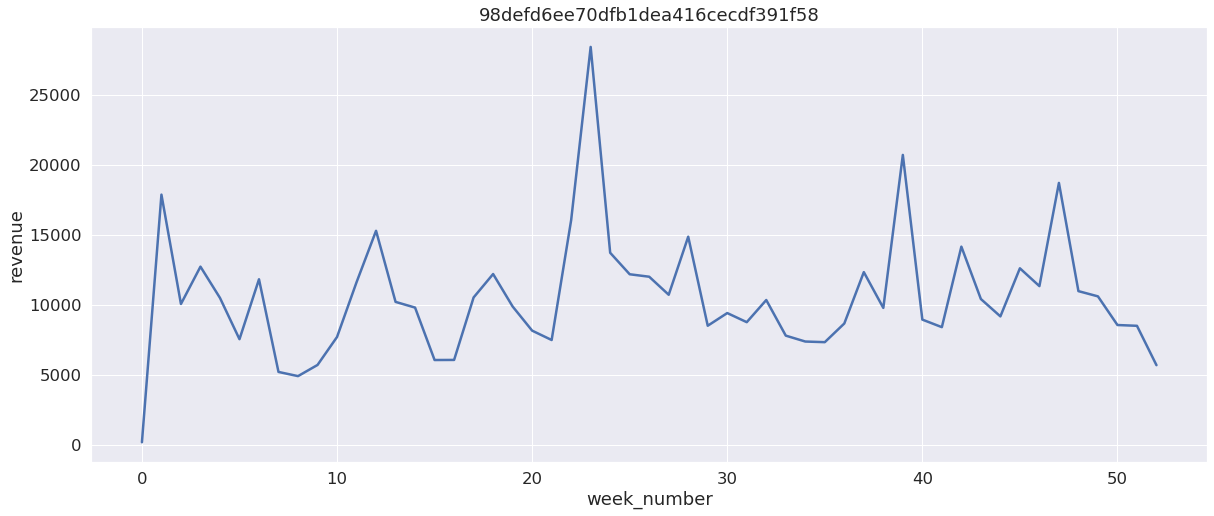

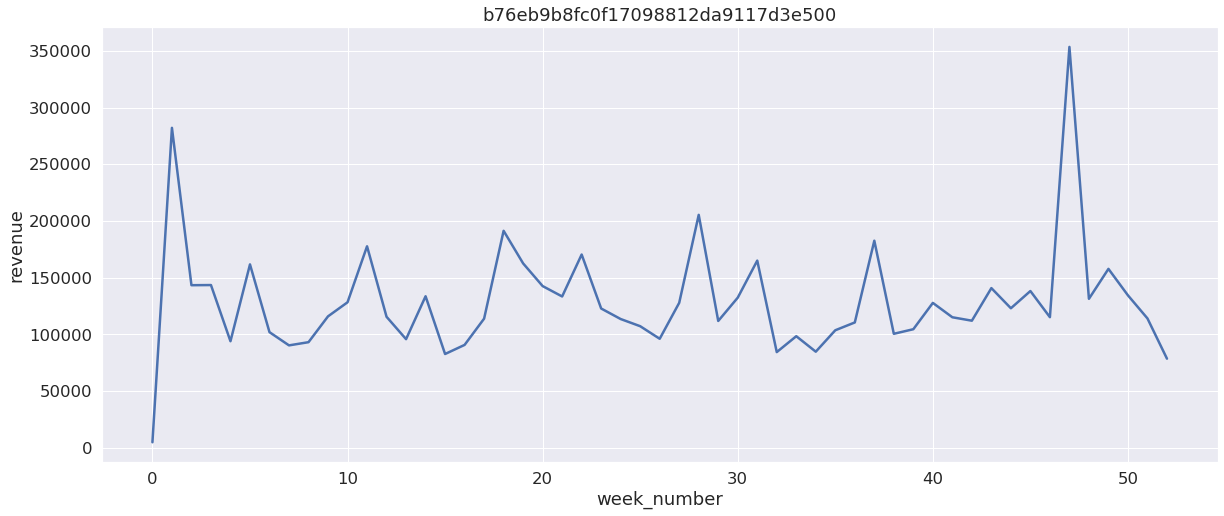

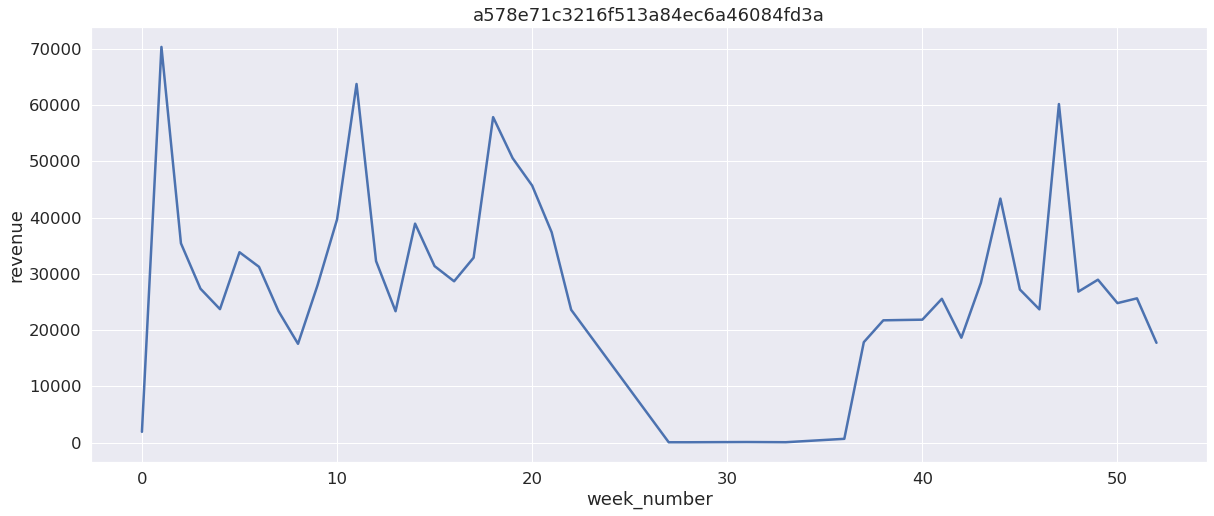

In [22]:

for chl in selected_channels: 
    df = df_filtered_sales[df_filtered_sales.source_channel == chl]
    ax = plot_season_sales(df,'revenue', base_col='week_number')
    ax.set_title(chl)
    plt.show()    

### Revenue
As for it seems to be following the same pattern as the quantities.